<a href="https://colab.research.google.com/github/daichi-a/PythonDataAnalyzeClassMaterial/blob/master/PyDataAnalyze_FactorAnalysis_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRu-c1WHRwaXQLHPZ30lNqgdsva0hv2v9mxkNHHSQnZQirDJbe2f5xqqkiI9_vOnE4m9xSPTU86elxB/pub?gid=176036142&single=true&output=csv')
df.head()

,観測地点,降水量の合計,日照時間,平均風速,平均湿度,平均雲量
0,秋田,51.0,72.6,4.4,74,9.5
1,秋田,93.5,74.0,5.0,75,9.3
2,秋田,113.5,70.7,3.1,72,8.5
3,秋田,172.5,66.4,3.7,75,9.5
4,秋田,64.5,58.8,4.6,74,9.6


In [2]:
# 高機能因子分析パッケージ
!pip install factor-analyzer

     |████████████████████████████████| 40kB 1.9MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40380 sha256=a82dc61dd576ab3b87aef8219eba435d2c10e2b25cc1365cb483e338af37f609
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [10]:
from factor_analyzer import FactorAnalyzer
import seaborn as sns

# 何因子だと考えるか
# とりあえず最初は多めに
n_factors=4


fa_model = FactorAnalyzer(n_factors=n_factors, method='ml', rotation='varimax', impute='drop')
# method: 使用する手法
# minres (ミンレス法)
# ml　（最尤法）
# principal（主因子法）

# rotation 回転法
# varimax (バリマックス回転) 直交法
# promax (プロマックス回転) 斜交法
# oblique (斜め回転)

# impute 欠損値をどうするか
# drop: 削除

x_label = ['降水量の合計', '日照時間', '平均風速', '平均湿度', '平均雲量']

# データにフィットさせる
# 因子分析の対象にするのは5観測変数であり，観測地点は使わないので0列目以外を抽出
fa_model.fit(df.iloc[:, 1:])

# 因子負荷量はloadings_プロパティで読み出せるので，結果のDataFrameを作る
# 因子負荷量：因子と観測変数の間の関係性の強弱のこと

# 行名(index)として，この列名のラベルを用いて，DataFrameを作る
df_result = pd.DataFrame(fa_model.loadings_, index=x_label)

# 因子負荷量の行列を色分けして表示
cm = sns.light_palette('red', as_cmap=True)
# セルの最後に実行すること．df.head()と同じく，printしても色分けされない
df_result.style.background_gradient(cmap=cm)

,0,1,2,3
降水量の合計,0.551815,0.256905,0.486516,0.005553
日照時間,-0.879561,-0.302970,-0.356798,0.047708
平均風速,0.726129,0.409227,0.206173,-0.021331
平均湿度,0.340020,0.884081,0.185110,0.002163
平均雲量,0.857699,0.425574,0.265133,0.089131


In [11]:
# Varimax回転の場合の因子数4での累積寄与率
factor_index = list([])
for i in range(n_factors):
  factor_index.append('共通因子' + str(i))
df_cumulative_variance = pd.DataFrame(fa_model.get_factor_variance()[2], index=factor_index)
df_cumulative_variance.style.background_gradient(cmap=cm)

,0
共通因子0,0.491331
共通因子1,0.748924
共通因子2,0.851139
共通因子3,0.853281


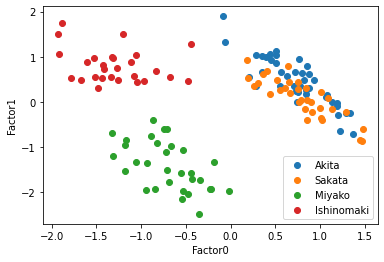

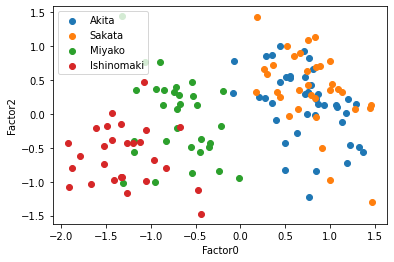

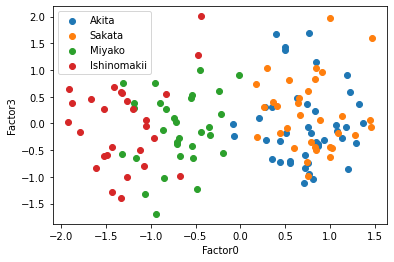

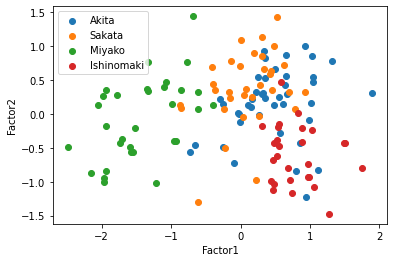

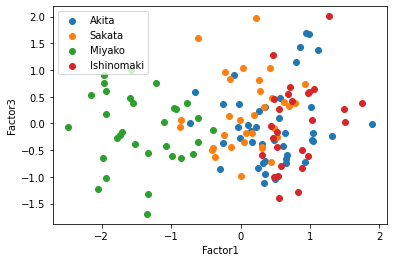

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30707 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24059 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 30707 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24059 missing from current font.
  font.set_text(s, 0, flags=flags)


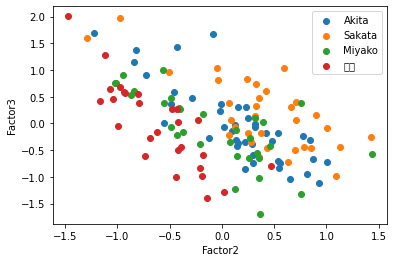

In [17]:
# 因子分析関数は欠損値のある行を削除してくれたが，グラフで描く時には関係ないので，
# まず欠損値のある行を削除して，再代入しておく
df = df.dropna(how='any')

# 因子分析の結果を使って，観測値を共通因子の値に変換する
factors_df = pd.DataFrame(fa_model.transform(df.iloc[:, 1:]))
num_of_row = df.values.shape[0]

# 潜在変数の値をプロットしてみる
akita = list([])
miyako = list([])
sakata = list([])
ishinomaki = list([])
for i in range(num_of_row):
  if df.values[i][0] == '秋田':
    akita.append(factors_df.iloc[i, :])
  elif df.values[i][0] == '宮古':
    miyako.append(factors_df.iloc[i, :])
  elif df.values[i][0] == '酒田':
    sakata.append(factors_df.iloc[i, :])
  else:
    ishinomaki.append(factors_df.iloc[i, :])

df_akita = pd.DataFrame(akita)
df_miyako = pd.DataFrame(miyako)
df_sakata = pd.DataFrame(sakata)
df_ishinomaki = pd.DataFrame(ishinomaki)

import matplotlib.pyplot as plt

plt.scatter(df_akita.iloc[:, 0], df_akita.iloc[:, 1], label='Akita')
plt.scatter(df_sakata.iloc[:, 0], df_sakata.iloc[:, 1], label='Sakata')
plt.scatter(df_miyako.iloc[:, 0], df_miyako.iloc[:, 1], label='Miyako')
plt.scatter(df_ishinomaki.iloc[:, 0], df_ishinomaki.iloc[:, 1], label='Ishinomaki')

plt.xlabel('Factor0')
plt.ylabel('Factor1')
plt.legend()
plt.show()

plt.scatter(df_akita.iloc[:, 0], df_akita.iloc[:, 2], label='Akita')
plt.scatter(df_sakata.iloc[:, 0], df_sakata.iloc[:, 2], label='Sakata')
plt.scatter(df_miyako.iloc[:, 0], df_miyako.iloc[:, 2], label='Miyako')
plt.scatter(df_ishinomaki.iloc[:, 0], df_ishinomaki.iloc[:, 2], label='Ishinomaki')

plt.xlabel('Factor0')
plt.ylabel('Factor2')
plt.legend()
plt.show()

plt.scatter(df_akita.iloc[:, 0], df_akita.iloc[:, 3], label='Akita')
plt.scatter(df_sakata.iloc[:, 0], df_sakata.iloc[:, 3], label='Sakata')
plt.scatter(df_miyako.iloc[:, 0], df_miyako.iloc[:, 3], label='Miyako')
plt.scatter(df_ishinomaki.iloc[:, 0], df_ishinomaki.iloc[:, 3], label='Ishinomakii')

plt.xlabel('Factor0')
plt.ylabel('Factor3')
plt.legend()
plt.show()

plt.scatter(df_akita.iloc[:, 1], df_akita.iloc[:, 2], label='Akita')
plt.scatter(df_sakata.iloc[:, 1], df_sakata.iloc[:, 2], label='Sakata')
plt.scatter(df_miyako.iloc[:, 1], df_miyako.iloc[:, 2], label='Miyako')
plt.scatter(df_ishinomaki.iloc[:, 1], df_ishinomaki.iloc[:, 2], label='Ishinomaki')

plt.xlabel('Factor1')
plt.ylabel('Factor2')
plt.legend()
plt.show()

plt.scatter(df_akita.iloc[:, 1], df_akita.iloc[:, 3], label='Akita')
plt.scatter(df_sakata.iloc[:, 1], df_sakata.iloc[:, 3], label='Sakata')
plt.scatter(df_miyako.iloc[:, 1], df_miyako.iloc[:, 3], label='Miyako')
plt.scatter(df_ishinomaki.iloc[:, 1], df_ishinomaki.iloc[:, 3], label='Ishinomaki')

plt.xlabel('Factor1')
plt.ylabel('Factor3')
plt.legend()
plt.show()

plt.scatter(df_akita.iloc[:, 2], df_akita.iloc[:, 3], label='Akita')
plt.scatter(df_sakata.iloc[:, 2], df_sakata.iloc[:, 3], label='Sakata')
plt.scatter(df_miyako.iloc[:, 2], df_miyako.iloc[:, 3], label='Miyako')
plt.scatter(df_ishinomaki.iloc[:, 2], df_ishinomaki.iloc[:, 3], label='石巻')

plt.xlabel('Factor2')
plt.ylabel('Factor3')
plt.legend()
plt.show()

In [18]:
# 共通因子数3の場合
n_factors=3
fa_model = FactorAnalyzer(n_factors=n_factors, method='ml', rotation='varimax', impute='drop')
fa_model.fit(df.iloc[:, 1:])

df_result = pd.DataFrame(fa_model.loadings_, index=x_label)

cm = sns.light_palette('red', as_cmap=True)
df_result.style.background_gradient(cmap=cm)

,0,1,2
降水量の合計,0.685739,0.277842,-0.162052
日照時間,-0.945632,-0.317458,-0.000909
平均風速,0.747814,0.409399,0.126773
平均湿度,0.356523,0.931560,-0.009350
平均雲量,0.884472,0.432232,0.089476


In [19]:
# Varimax回転の時の共通因子数3での累積寄与率
factor_index = list([])
for i in range(n_factors):
  factor_index.append('共通因子' + str(i))
df_cumulative_variance = pd.DataFrame(fa_model.get_factor_variance()[2], index=factor_index)
df_cumulative_variance.style.background_gradient(cmap=cm)

,0
共通因子0,0.566617
共通因子1,0.846659
共通因子2,0.856744


In [20]:
# 共通因子数2の場合
n_factors=2
fa_model = FactorAnalyzer(n_factors=n_factors, method='ml', rotation='varimax', impute='drop')
fa_model.fit(df.iloc[:, 1:])

df_result = pd.DataFrame(fa_model.loadings_, index=x_label)

cm = sns.light_palette('red', as_cmap=True)
df_result.style.background_gradient(cmap=cm)

,0,1
降水量の合計,0.678856,0.285942
日照時間,-0.927082,-0.368165
平均風速,0.710575,0.484701
平均湿度,0.363824,0.803370
平均雲量,0.848234,0.508556


In [21]:
# Varimax回転の時の共通因子数2での累積寄与率
factor_index = list([])
for i in range(n_factors):
  factor_index.append('共通因子' + str(i))
df_cumulative_variance = pd.DataFrame(fa_model.get_factor_variance()[2], index=factor_index)
df_cumulative_variance.style.background_gradient(cmap=cm)

,0
共通因子0,0.535422
共通因子1,0.806678


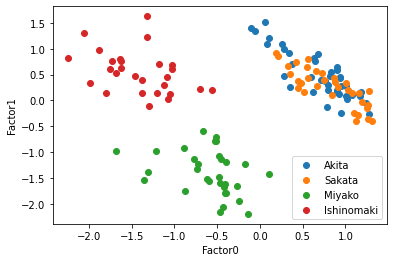

In [22]:
# 因子分析の結果を使って，観測値を共通因子の値に変換する
factors_df = pd.DataFrame(fa_model.transform(df.iloc[:, 1:]))
num_of_row = df.values.shape[0]

# 潜在変数の値をプロットしてみる
akita = list([])
miyako = list([])
sakata = list([])
ishinomaki = list([])
for i in range(num_of_row):
  if df.values[i][0] == '秋田':
    akita.append(factors_df.iloc[i, :])
  elif df.values[i][0] == '宮古':
    miyako.append(factors_df.iloc[i, :])
  elif df.values[i][0] == '酒田':
    sakata.append(factors_df.iloc[i, :])
  else:
    ishinomaki.append(factors_df.iloc[i, :])

df_akita = pd.DataFrame(akita)
df_miyako = pd.DataFrame(miyako)
df_sakata = pd.DataFrame(sakata)
df_ishinomaki = pd.DataFrame(ishinomaki)

import matplotlib.pyplot as plt

plt.scatter(df_akita.iloc[:, 0], df_akita.iloc[:, 1], label='Akita')
plt.scatter(df_sakata.iloc[:, 0], df_sakata.iloc[:, 1], label='Sakata')
plt.scatter(df_miyako.iloc[:, 0], df_miyako.iloc[:, 1], label='Miyako')
plt.scatter(df_ishinomaki.iloc[:, 0], df_ishinomaki.iloc[:, 1], label='Ishinomaki')

plt.xlabel('Factor0')
plt.ylabel('Factor1')
plt.legend()
plt.show()

In [25]:
# 共通因子数2のPromax回転の場合
n_factors=2
fa_model = FactorAnalyzer(n_factors=n_factors, method='ml', rotation='promax', impute='drop')
fa_model.fit(df.iloc[:, 1:])

df_result = pd.DataFrame(fa_model.loadings_, index=x_label)
cm = sns.light_palette('red', as_cmap=True)
df_result.style.background_gradient(cmap=cm)

,0,1
降水量の合計,0.752158,-0.021033
日照時間,-1.040935,0.059330
平均風速,0.673172,0.232083
平均湿度,0.002900,0.879751
平均雲量,0.846705,0.181042


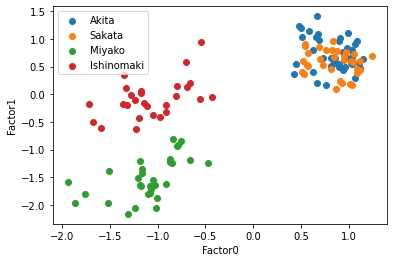

In [26]:
# 因子分析の結果を使って，観測値を共通因子の値に変換する
factors_df = pd.DataFrame(fa_model.transform(df.iloc[:, 1:]))
num_of_row = df.values.shape[0]

# 潜在変数の値をプロットしてみる
akita = list([])
miyako = list([])
sakata = list([])
ishinomaki = list([])
for i in range(num_of_row):
  if df.values[i][0] == '秋田':
    akita.append(factors_df.iloc[i, :])
  elif df.values[i][0] == '宮古':
    miyako.append(factors_df.iloc[i, :])
  elif df.values[i][0] == '酒田':
    sakata.append(factors_df.iloc[i, :])
  else:
    ishinomaki.append(factors_df.iloc[i, :])

df_akita = pd.DataFrame(akita)
df_miyako = pd.DataFrame(miyako)
df_sakata = pd.DataFrame(sakata)
df_ishinomaki = pd.DataFrame(ishinomaki)

plt.scatter(df_akita.iloc[:, 0], df_akita.iloc[:, 1], label='Akita')
plt.scatter(df_sakata.iloc[:, 0], df_sakata.iloc[:, 1], label='Sakata')
plt.scatter(df_miyako.iloc[:, 0], df_miyako.iloc[:, 1], label='Miyako')
plt.scatter(df_ishinomaki.iloc[:, 0], df_ishinomaki.iloc[:, 1], label='Ishinomaki')

plt.xlabel('Factor0')
plt.ylabel('Factor1')
plt.legend()
plt.show()